In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data=pd.read_csv('train.csv')

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(training_data)

891

In [5]:
# survived vs not survived

<AxesSubplot: xlabel='Survived', ylabel='count'>

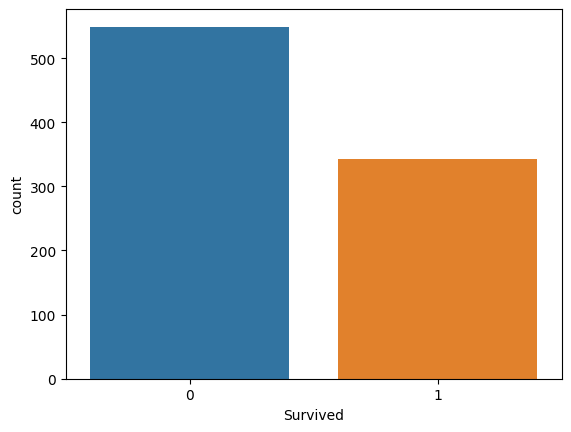

In [6]:
sns.countplot(x='Survived',data=training_data)

In [7]:
#male vs female survived

<AxesSubplot: xlabel='Survived', ylabel='count'>

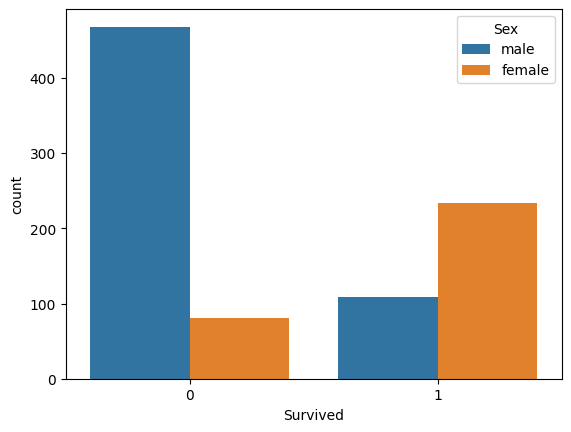

In [8]:
sns.countplot(x='Survived',data=training_data,hue='Sex')

In [9]:
#data cleaning

In [10]:
training_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#drop Cabin column

In [12]:
#fill age with mean

In [13]:
test_data = pd.read_csv("test.csv")
test_data_ids = test_data["PassengerId"]

In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data

training_data = clean(training_data)
test_data = clean(test_data)

In [16]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
training_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
test_data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    training_data[col] = le.fit_transform(training_data[col])
    test_data[col] = le.transform(test_data[col])
    print(le.classes_)

['female' 'male']
['C' 'Q' 'S' 'U']


In [20]:
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
#logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = training_data["Survived"]
x = training_data.drop("Survived",axis=1)

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train,Y_train)

In [24]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_val)
accuracy_score(Y_val,predictions)

0.8100558659217877

In [25]:
submission_preds = clf.predict(test_data)

In [26]:
df = pd.DataFrame({"PassengerId":test_data_ids.values,
                  "Survived":submission_preds,
                  })

In [28]:
df.to_csv("submission.csv",index=False)